In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt

In [3]:
file_location = 'C:/Users/ragir/OneDrive/Desktop/DATA ANALYTICS/Portfolio Projects/Case Study 1/Monthly Clean Data/'

df1 = pd.read_excel(file_location + 'January2022.xlsx')
df2 = pd.read_excel(file_location + 'February2022.xlsx')
df3 = pd.read_excel(file_location + 'March2022.xlsx')
df4 = pd.read_excel(file_location + 'April2022.xlsx')
df5 = pd.read_excel(file_location + 'May2022.xlsx')
df6 = pd.read_excel(file_location + 'June2022.xlsx')
df7 = pd.read_excel(file_location + 'July2022.xlsx')
df8 = pd.read_excel(file_location + 'August2022.xlsx')
df9 = pd.read_excel(file_location + 'September2022.xlsx')
df10 = pd.read_excel(file_location + 'October2022.xlsx')
df11 = pd.read_excel(file_location + 'November2022.xlsx')
df12 = pd.read_excel(file_location + 'December2022.xlsx')



In [4]:
# Merging all the data
Cyclistic_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0, ignore_index=True)


In [5]:
# Viewing top 5 of the merged data
Cyclistic_data.head()

,ride_id,rideable_type,start_lat,start_lng,end_lat,end_lng,member_type,start_datetime,end_datetime
0,98D355D9A9852BE9,classic_bike,41.872773,-87.623981,41.872773,-87.623981,casual,2022-01-01 00:00:05,2022-01-01 00:01:48
1,04706CA7F5BD25EE,electric_bike,41.949073,-87.648633,41.937582,-87.644098,casual,2022-01-01 00:01:00,2022-01-01 00:04:39
2,42178E850B92597A,electric_bike,41.875919,-87.631194,41.875933,-87.630585,casual,2022-01-01 00:01:16,2022-01-01 00:32:14
3,6B93C46E8F5B114C,classic_bike,41.872773,-87.623981,41.872773,-87.623981,casual,2022-01-01 00:02:14,2022-01-01 00:31:07
4,466943353EAC8022,classic_bike,41.872773,-87.623981,41.872773,-87.623981,casual,2022-01-01 00:02:35,2022-01-01 00:31:04


In [6]:
# Check data info, data types
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240260 entries, 0 to 5240259
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   ride_id         object        
 1   rideable_type   object        
 2   start_lat       float64       
 3   start_lng       float64       
 4   end_lat         float64       
 5   end_lng         float64       
 6   member_type     object        
 7   start_datetime  datetime64[ns]
 8   end_datetime    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 359.8+ MB


In [37]:
# Change ride_id and member_type columns into categorical datatype
Cyclistic_data['rideable_type'] = Cyclistic_data['rideable_type'].astype('category')
Cyclistic_data['member_type'] = Cyclistic_data['member_type'].astype('category')

In [9]:
#Drop start_lat, start_lng, end_lat, end_lng columns
Cyclistic_data.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)


In [38]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240260 entries, 0 to 5240259
Data columns (total 8 columns):
 #   Column          Dtype          
---  ------          -----          
 0   ride_id         object         
 1   rideable_type   category       
 2   member_type     category       
 3   start_datetime  datetime64[ns] 
 4   end_datetime    datetime64[ns] 
 5   ride_length     timedelta64[ns]
 6   day_of_week     category       
 7   month_name      category       
dtypes: category(4), datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 179.9+ MB


In [11]:
# Check for nulls
Cyclistic_data.isnull().sum()

ride_id           0
rideable_type     0
member_type       0
start_datetime    0
end_datetime      0
dtype: int64

In [13]:
# Create a new column ride_length(end_datetime- start_datetime) to get time travelled
Cyclistic_data['ride_length'] = Cyclistic_data['end_datetime'] - Cyclistic_data['start_datetime']
Cyclistic_data['ride_length']

0         0 days 00:01:43
1         0 days 00:03:39
2         0 days 00:30:58
3         0 days 00:28:53
4         0 days 00:28:29
                ...      
5240255   0 days 00:24:22
5240256   0 days 00:08:39
5240257   0 days 00:18:12
5240258   0 days 00:17:49
5240259   0 days 00:02:28
Name: ride_length, Length: 5240260, dtype: timedelta64[ns]

In [39]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240260 entries, 0 to 5240259
Data columns (total 8 columns):
 #   Column          Dtype          
---  ------          -----          
 0   ride_id         object         
 1   rideable_type   category       
 2   member_type     category       
 3   start_datetime  datetime64[ns] 
 4   end_datetime    datetime64[ns] 
 5   ride_length     timedelta64[ns]
 6   day_of_week     category       
 7   month_name      category       
dtypes: category(4), datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 179.9+ MB


In [17]:
# Add day_of_week column extracted from start_datetime column
Cyclistic_data['day_of_week'] = Cyclistic_data['start_datetime'].dt.day_name()
Cyclistic_data.day_of_week.head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: day_of_week, dtype: object

In [18]:
# Add month_name column from start_datetime column
Cyclistic_data['month_name'] = Cyclistic_data['start_datetime'].dt.month_name()
Cyclistic_data.month_name.head()

0    January
1    January
2    January
3    January
4    January
Name: month_name, dtype: object

In [41]:
# Converting day_of_week and month_name into categorical datatype
Cyclistic_data['day_of_week'] = Cyclistic_data['day_of_week'].astype('category')
Cyclistic_data['month_name'] = Cyclistic_data['month_name'].astype('category')
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240260 entries, 0 to 5240259
Data columns (total 8 columns):
 #   Column          Dtype          
---  ------          -----          
 0   ride_id         object         
 1   rideable_type   category       
 2   member_type     category       
 3   start_datetime  datetime64[ns] 
 4   end_datetime    datetime64[ns] 
 5   ride_length     timedelta64[ns]
 6   day_of_week     category       
 7   month_name      category       
dtypes: category(4), datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 179.9+ MB


In [21]:
Cyclistic_data.shape

(5240260, 8)

In [22]:
# Print cleaned dataset
Cyclistic_data.head()

,ride_id,rideable_type,member_type,start_datetime,end_datetime,ride_length,day_of_week,month_name
0,98D355D9A9852BE9,classic_bike,casual,2022-01-01 00:00:05,2022-01-01 00:01:48,0 days 00:01:43,Saturday,January
1,04706CA7F5BD25EE,electric_bike,casual,2022-01-01 00:01:00,2022-01-01 00:04:39,0 days 00:03:39,Saturday,January
2,42178E850B92597A,electric_bike,casual,2022-01-01 00:01:16,2022-01-01 00:32:14,0 days 00:30:58,Saturday,January
3,6B93C46E8F5B114C,classic_bike,casual,2022-01-01 00:02:14,2022-01-01 00:31:07,0 days 00:28:53,Saturday,January
4,466943353EAC8022,classic_bike,casual,2022-01-01 00:02:35,2022-01-01 00:31:04,0 days 00:28:29,Saturday,January


In [23]:
# Check for duplicate values in the dataset
Cyclistic_data.duplicated().any()

False

# Exploratory Data Analysis

In [42]:
Cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240260 entries, 0 to 5240259
Data columns (total 8 columns):
 #   Column          Dtype          
---  ------          -----          
 0   ride_id         object         
 1   rideable_type   category       
 2   member_type     category       
 3   start_datetime  datetime64[ns] 
 4   end_datetime    datetime64[ns] 
 5   ride_length     timedelta64[ns]
 6   day_of_week     category       
 7   month_name      category       
dtypes: category(4), datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 179.9+ MB


In [43]:
# Filter negative durations
negative_duration = Cyclistic_data['ride_length'] < '00:00:00'
# Show the number of negative time duration
Cyclistic_data[negative_duration].count()

ride_id           92
rideable_type     92
member_type       92
start_datetime    92
end_datetime      92
ride_length       92
day_of_week       92
month_name        92
dtype: int64

In [44]:
# Remove the negative duration
Cyclistic_data.drop(Cyclistic_data[negative_duration].index, inplace=True)

In [46]:
# Remove ride_length < 60 seconds
less_duration = Cyclistic_data['ride_length'] < '00:00:60'
# Show the number of less duration
Cyclistic_data[less_duration].count()

ride_id           92194
rideable_type     92194
member_type       92194
start_datetime    92194
end_datetime      92194
ride_length       92194
day_of_week       92194
month_name        92194
dtype: int64

In [47]:
# Remove the less duration
Cyclistic_data.drop(Cyclistic_data[less_duration].index, inplace=True)

In [51]:
# Calculate mean of ride_length for all types of users
Cyclistic_data.ride_length.describe(datetime_is_numeric=True)


count                      5147974
mean     0 days 00:20:21.851466810
std      0 days 03:04:38.717368676
min                0 days 00:01:00
25%                0 days 00:06:11
50%                0 days 00:10:40
75%                0 days 00:18:57
max               28 days 17:47:15
Name: ride_length, dtype: object

In [54]:
# Filter ride_length for member type 'member' riders
member_filter = Cyclistic_data['member_type'] == 'member'
Cyclistic_data[member_filter].ride_length.describe()


count                      3051335
mean     0 days 00:13:03.892493941
std      0 days 00:29:41.918734088
min                0 days 00:01:00
25%                0 days 00:05:24
50%                0 days 00:09:08
75%                0 days 00:15:34
max                1 days 01:59:54
Name: ride_length, dtype: object

In [55]:
# filtering the ride length for casual riders
Cyclistic_data[~member_filter].ride_length.describe()

count                      2096639
mean     0 days 00:30:59.233268101
std      0 days 04:46:46.330554587
min                0 days 00:01:00
25%                0 days 00:07:50
50%                0 days 00:13:36
75%                0 days 00:25:05
max               28 days 17:47:15
Name: ride_length, dtype: object

In [56]:
# calculate the mode of week-day of all users 
mode_week_day = Cyclistic_data['day_of_week'].mode()
mode_week_day


0    Saturday
Name: day_of_week, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [57]:
# Calculate mode of weekday for member riders
mode_week_day_member = Cyclistic_data[Cyclistic_data['member_type'] == 'member']
mode_week_day_member = mode_week_day_member['day_of_week'].mode()
mode_week_day_member

0    Thursday
Name: day_of_week, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [58]:
# Calculate mode of weekday for casual riders
mode_week_day_member = Cyclistic_data[Cyclistic_data['member_type'] == 'casual']
mode_week_day_member = mode_week_day_member['day_of_week'].mode()
mode_week_day_member

0    Saturday
Name: day_of_week, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [60]:
# Calculate number of rides in day_of_week throughout the year
count_users = Cyclistic_data.groupby('day_of_week')['ride_id'].count()
count_users = count_users.sort_index()
count_users

day_of_week
Friday       724230
Monday       684119
Saturday     830742
Sunday       703163
Thursday     765012
Tuesday      713357
Wednesday    727351
Name: ride_id, dtype: int64

In [61]:
# Calculate number of rides by member type in day_of_week throughout the week --Member riders
count_members = Cyclistic_data[Cyclistic_data['member_type'] == 'member'].groupby('day_of_week')['ride_id'].count()
count_members

day_of_week
Friday       423831
Monday       433510
Saturday     400567
Sunday       350036
Thursday     486701
Tuesday      476159
Wednesday    480531
Name: ride_id, dtype: int64

In [73]:
# Calculate number of rides by member type in day_of_week throughout the week --Casual riders
count_casual = Cyclistic_data[Cyclistic_data['member_type'] == 'casual'].groupby('day_of_week')['ride_id'].count()
count_casual

day_of_week
Friday       300399
Monday       250609
Saturday     430175
Sunday       353127
Thursday     278311
Tuesday      237198
Wednesday    246820
Name: ride_id, dtype: int64

In [64]:
# Breakdown monthly number of users 
monthly_users = Cyclistic_data.groupby('month_name')['ride_id'].count()
monthly_users = monthly_users.sort_index()
monthly_users

month_name
April        318958
August       720404
December     164339
February     101404
January       91978
July         757216
June         712328
March        250098
May          577464
November     307819
October      505391
September    640575
Name: ride_id, dtype: int64

In [65]:
# Calculate monthly number of rides by member type -Member riders
monthly_members = Cyclistic_data[Cyclistic_data['member_type'] == 'member'].groupby('month_name')['ride_id'].count()
monthly_members

month_name
April        209416
August       394887
December     124721
February      82986
January       76318
July         386708
June         373503
March        170540
May          322728
November     217778
October      319100
September    372650
Name: ride_id, dtype: int64

In [171]:
# Calculate monthly number of rides by member type -Casual riders
monthly_casual = Cyclistic_data[Cyclistic_data['member_type'] == 'casual'].groupby('month_name')['ride_id'].count()
monthly_casual

month_name
April        109542
August       325517
December      39618
February      18418
January       15660
July         370508
June         338825
March         79558
May          254736
November      90041
October      186291
September    267925
Name: ride_id, dtype: int64

# Visualization

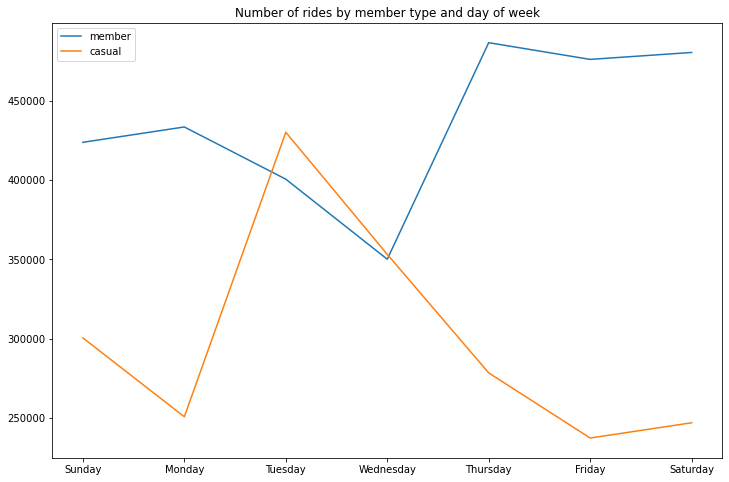

In [135]:
# plot the graph for number of rides by casual riders and annual members 
import matplotlib.pyplot as plt

# Group the data by day of week and member type
grouped_df = Cyclistic_data.groupby(['day_of_week', 'member_type'])

# Calculate the count of rides for each group
counts = grouped_df['ride_id'].count().reset_index()

# Pivot the data to have one row per day of week and two columns, one for each member type
pivot_df = counts.pivot(index='day_of_week', columns='member_type', values='ride_id')

# Plot the line graph
plt.figure(figsize = (12,8))
plt.plot(pivot_df.index, pivot_df['member'].values)
plt.plot(pivot_df.index, pivot_df['casual'].values)
plt.title('Number of rides by member type and day of week')
plt.legend(['member', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(pivot_df.index, labels)
plt.show()




From the visualization above we see there is a spike in the number of casual riders during mid-week whereas a sharp drop of member riders during the same period. However, the opposite is observed during weekends; member riders have a steady increase, casual riders have a heavy drop.


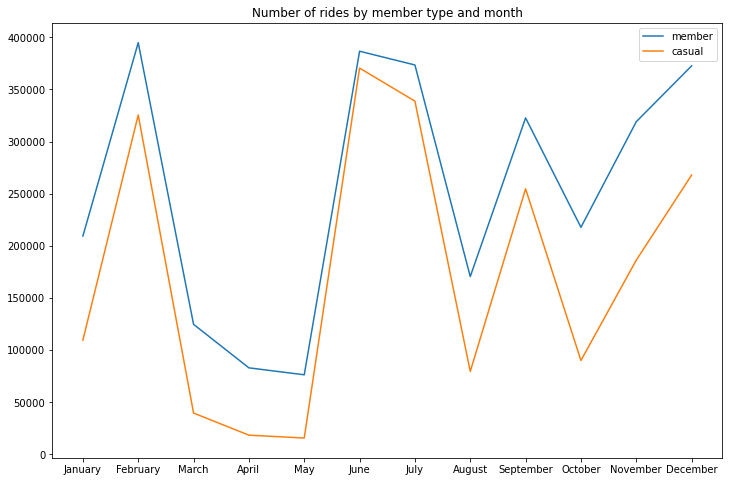

In [136]:
# plot the graph for monthly number of rides by casual riders and annual members 
import matplotlib.pyplot as plt

# Group the data by month_name and member type
grouped_df = Cyclistic_data.groupby(['month_name', 'member_type'])

# Calculate the count of rides for each group
counts = grouped_df['ride_id'].count().reset_index()

# Pivot the data to have one row per month_name and two columns, one for each member type
pivot_df = counts.pivot(index='month_name', columns='member_type', values='ride_id')

# Plot the line graph
plt.figure(figsize = (12,8))
plt.plot(pivot_df.index, pivot_df['member'].values)
plt.plot(pivot_df.index, pivot_df['casual'].values)
plt.title('Number of rides by member type and month')
plt.legend(['member', 'casual'])
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(pivot_df.index, labels)
plt.show()


The above illustration shows a similar trend in monthly number of rides by member type. 

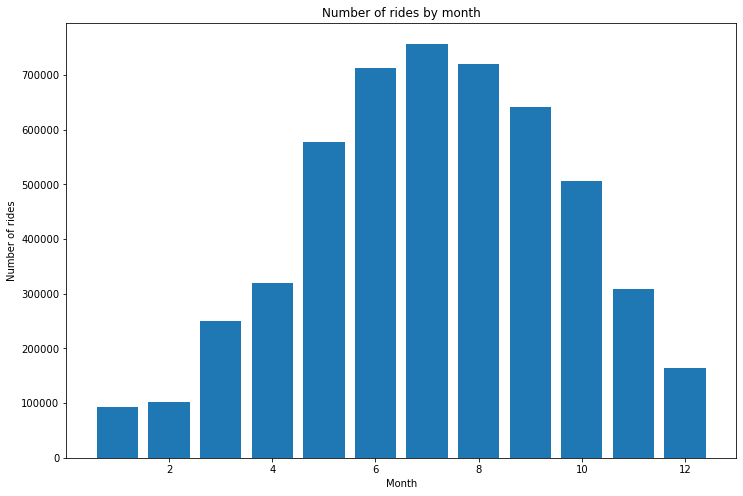

In [177]:
# Plot a graph for monthly number of rides
import matplotlib.pyplot as plt

# group the data by month_name
monthly_rides = Cyclistic_data.groupby(['month'])['ride_id'].count()

# plot the bar graph
plt.figure(figsize = (12,8))
plt.bar(monthly_rides.index, monthly_rides.values)
plt.title('Number of rides by month')
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.show()



In [137]:
# calculate the average ride length for all users in a week
user_avg_rides = Cyclistic_data.groupby('day_of_week')['ride_length'].mean(numeric_only=False)
user_avg_rides


day_of_week
Friday      0 days 00:19:56.241119533
Monday      0 days 00:19:21.330639844
Saturday    0 days 00:24:57.583177448
Sunday      0 days 00:25:22.650886067
Thursday    0 days 00:17:53.592867824
Tuesday     0 days 00:17:25.930263528
Wednesday   0 days 00:17:07.024655221
Name: ride_length, dtype: timedelta64[ns]

In [138]:
# calculate the average ride length for members in a week
user_avg_members = Cyclistic_data[Cyclistic_data['member_type'] == 'member'].groupby('day_of_week')['ride_length'].mean(numeric_only=False)
user_avg_members

day_of_week
Friday      0 days 00:12:52.200454898
Monday      0 days 00:12:36.307054047
Saturday    0 days 00:14:35.926701400
Sunday      0 days 00:14:29.195445611
Thursday    0 days 00:12:37.072755141
Tuesday     0 days 00:12:26.335121251
Wednesday   0 days 00:12:24.614106061
Name: ride_length, dtype: timedelta64[ns]

In [139]:
# calculate the average ride length for casual_riders in a week
user_avg_casual = Cyclistic_data[Cyclistic_data['member_type'] == 'casual'].groupby('day_of_week')['ride_length'].mean(numeric_only=False)
user_avg_casual 

day_of_week
Friday      0 days 00:29:54.517341935
Monday      0 days 00:31:01.951027297
Saturday    0 days 00:34:36.452404254
Sunday      0 days 00:36:10.386484182
Thursday    0 days 00:27:07.112690479
Tuesday     0 days 00:27:27.347321646
Wednesday   0 days 00:26:16.846483267
Name: ride_length, dtype: timedelta64[ns]

In [140]:
# calculate the average ride length for all users in a month
month_avg_rides = Cyclistic_data.groupby('month_name')['ride_length'].mean(numeric_only=False)
month_avg_rides

month_name
April       0 days 00:18:53.270653189
August      0 days 00:21:33.214521296
December    0 days 00:14:02.655863793
February    0 days 00:14:55.000719892
January     0 days 00:15:57.238546174
July        0 days 00:22:15.967824240
June        0 days 00:23:35.117799665
March       0 days 00:19:36.536937520
May         0 days 00:22:06.920770818
November    0 days 00:14:43.059258850
October     0 days 00:18:13.650286609
September   0 days 00:20:09.831762088
Name: ride_length, dtype: timedelta64[ns]

In [141]:
# calculate the average ride length for members in a month
month_avg_members = Cyclistic_data[Cyclistic_data['member_type'] == 'member'].groupby('month_name')['ride_length'].mean(numeric_only=False)
month_avg_members

month_name
April       0 days 00:12:02.959224701
August      0 days 00:13:40.416904076
December    0 days 00:10:48.951411550
February    0 days 00:11:47.179078398
January     0 days 00:12:19.306480777
July        0 days 00:14:02.070158879
June        0 days 00:14:17.654977336
March       0 days 00:12:24.193532309
May         0 days 00:13:48.997840286
November    0 days 00:11:21.027266298
October     0 days 00:12:18.341632717
September   0 days 00:13:14.729786663
Name: ride_length, dtype: timedelta64[ns]

In [142]:
# calculate the average ride length for casual_riders in a month
month_avg_casual = Cyclistic_data[Cyclistic_data['member_type'] == 'casual'].groupby('month_name')['ride_length'].mean(numeric_only=False)
month_avg_casual 

month_name
April       0 days 00:31:57.680086176
August      0 days 00:31:06.768691036
December    0 days 00:24:12.454768034
February    0 days 00:29:01.268867412
January     0 days 00:33:39.316411238
July        0 days 00:30:51.460548760
June        0 days 00:33:49.635726407
March       0 days 00:35:03.305387264
May         0 days 00:32:37.745120438
November    0 days 00:22:51.704690085
October     0 days 00:28:22.262573071
September   0 days 00:29:47.186436502
Name: ride_length, dtype: timedelta64[ns]

<function matplotlib.pyplot.show(close=None, block=None)>

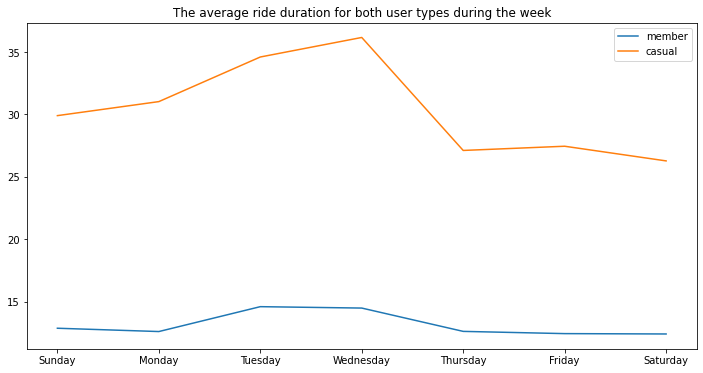

In [144]:
# plot the average ride_length for different users during the week
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(user_avg_members/pd.Timedelta(minutes=1))
plt.plot(user_avg_casual/pd.Timedelta(minutes=1))
plt.title('The average ride duration for both user types during the week')
plt.legend(['member', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(user_avg_members.index, labels)
plt.show

The above visualization shows that casual riders have a higher average ride duration during the week than members

<function matplotlib.pyplot.show(close=None, block=None)>

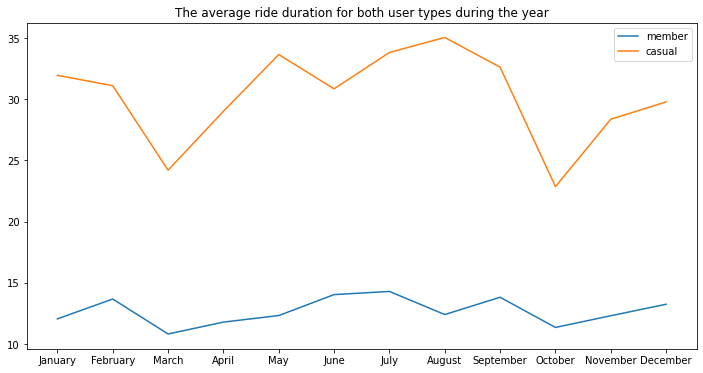

In [146]:
# plot the average ride_length for different users during the year
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(month_avg_members/pd.Timedelta(minutes=1))
plt.plot(month_avg_casual/pd.Timedelta(minutes=1))
plt.title('The average ride duration for both user types during the year')
plt.legend(['member', 'casual'])
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(month_avg_members.index, labels)
plt.show

The trend continues with monthly data with the above visualization showing that casual riders have a higher average ride duration throughout the year than members

In [150]:
# check the number of users in each type over the past 12 months
user_types = Cyclistic_data['member_type'].value_counts()
user_types

member    3051335
casual    2096639
Name: member_type, dtype: int64

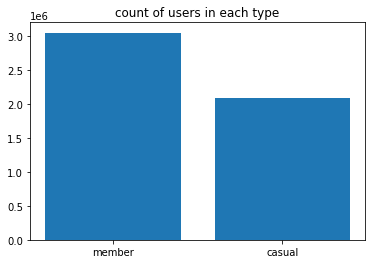

In [151]:
# Plot a bar graph of the number of users in each type over the past 12 months

plt.title('count of users in each type')
plt.bar(user_types.index, user_types.values)
plt.show()

Text(0.5, 1.0, 'Pie Chart of member type')

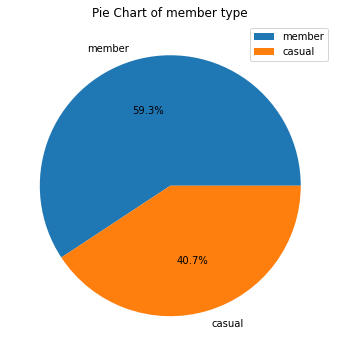

In [153]:
# Plot a pie chart of users in each type 
plt.figure(figsize = (9,6))
plt.pie(user_types.values, labels= user_types.index, autopct= '%1.1f%%')
plt.legend(user_types.index)
plt.show
plt.title('Pie Chart of member type')

Both the bar graph and pie chart show that Cyclistic has more members than casual riders

In [187]:
# To check the amount of users for a particular rideable_type
ride_type = Cyclistic_data.groupby('member_type')['rideable_type'].value_counts()
ride_type

member_type               
casual       electric_bike    1042001
             classic_bike      878680
             docked_bike       175958
member       classic_bike     1684007
             electric_bike    1367328
             docked_bike            0
Name: rideable_type, dtype: int64

In [188]:
# Separate the number of users into members and casual riders based on rideable type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
    list_x.append(j)
    list_member.append(str(i))

C:\Users\ragir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

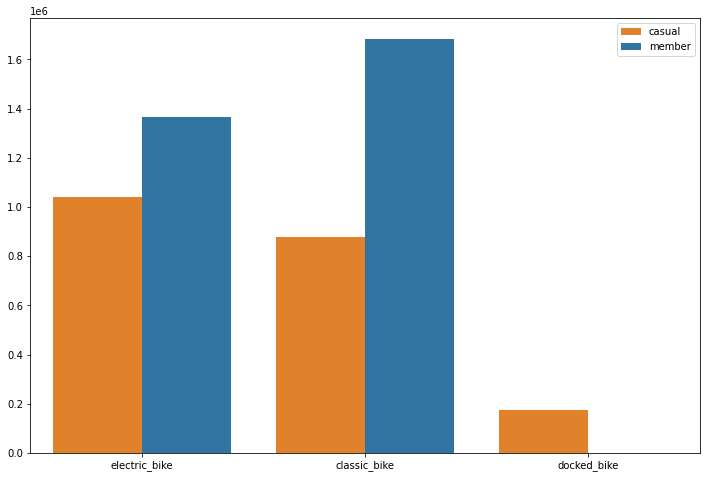

In [189]:
# Plot the number of users into members and casual riders based on rideable type
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(list_x, list_y, hue=list_member, palette=['#ff7f0e', '#1f77b4'])


We see that members use bikes more and that member riders do not use docked bikes at all

In [190]:
# Calculate the total amount of users in each category per month
users_over_month = Cyclistic_data.groupby('month')['member_type'].value_counts()
users_over_month

month        
1      member     76318
       casual     15660
2      member     82986
       casual     18418
3      member    170540
       casual     79558
4      member    209416
       casual    109542
5      member    322728
       casual    254736
6      member    373503
       casual    338825
7      member    386708
       casual    370508
8      member    394887
       casual    325517
9      member    372650
       casual    267925
10     member    319100
       casual    186291
11     member    217778
       casual     90041
12     member    124721
       casual     39618
Name: member_type, dtype: int64

The trend is pretty much similar throughout the year with member riders being more than casual riders.

In [191]:
#Separate the number of users into members and casual over months
list_month = []
list_x = []
list_y = (users_over_month.values)
for i, j in users_over_month.index:
    list_x.append(j)
    list_month.append(str(i))

C:\Users\ragir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of member and casual riders over the months')

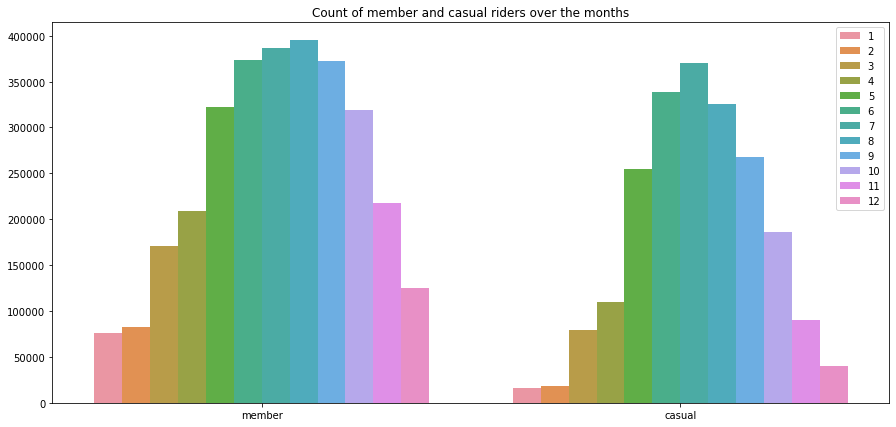

In [192]:
# plot count of members and casual riders
plt.figure(figsize= (15,7))
sns.barplot(list_x, list_y, hue =list_month)
plt.title('Count of member and casual riders over the months')

The above visualization shows monthly member and casual rides distribution throughout the year.

In [193]:
# check the number of each rideable type over the past 12 months
ride_types = Cyclistic_data['rideable_type'].value_counts()
ride_types

classic_bike     2562687
electric_bike    2409329
docked_bike       175958
Name: rideable_type, dtype: int64

Text(0.5, 1.0, 'Pie Chart of rideable type')

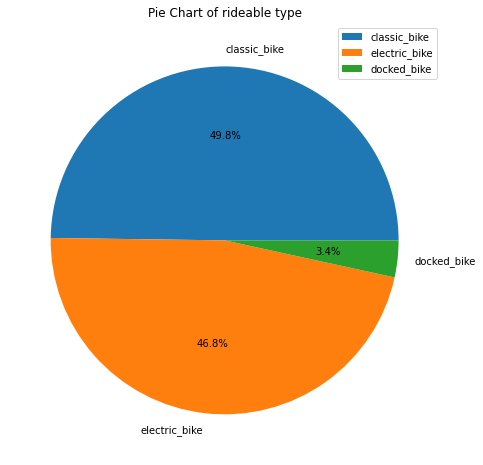

In [196]:
# Plot a pie chart of users in each type 
plt.figure(figsize = (10,8))
plt.pie(ride_types.values, labels= ride_types.index, autopct= '%1.1f%%')
plt.legend(ride_types.index)
plt.show
plt.title('Pie Chart of rideable type')

# Conclusion

## Insights

- Cyclistic has more members than casual riders subscribed to the ride share
- Casual riders use bikes for longer periods of time compared to members
- Casual riders use bikes more during mid-week,Tuesday and Wednesday, while members from Thursdays to the weekends
- Generally ride usage surges from May to August for both member types most likely due to the warm summer season
- Winter season months, November to April, have low ride numbers moslty due to the harsh weather conditions during this times
- The docked bike is the least used rideable type with zero usage by members


## Recommendations

- The company should consider using marketing strategies that target casual riders more during weekdays when commuting to work
- During warm months, when there's surge in number of casual riders, the company should consider discounting ride rates for casual riders who subscribe for membership 
- To increase usage of docked bikes, the company can discount the ride rates for this type for both members and casual riders, and incentivize casual riders who subscribe for membership with docked bikes